**Rancel Hernandez**

**Jan 12, 2025**

**Student ID: 012218003**

# Introduction

## Medication Association Rules Analysis

This project explores the complex relationships between different medication classifications prescribed to patients using market basket analysis techniques. By identifying significant associations between medication categories, this analysis aims to uncover prescription patterns that could provide valuable insights for healthcare providers.

### Research Question
What are the most significant and strongest associations between medication classifications prescribed to patients, and how frequently do these combinations occur?

### Project Context
Understanding the relationships between medication classifications is crucial for healthcare providers to optimize prescription practices and improve patient outcomes. By analyzing which medications are commonly prescribed together, we can identify patterns that may reveal underlying treatment protocols, potential drug interactions, or opportunities for more effective medication management.

### Business Value
The insights gained from this analysis can help healthcare facilities:
- Identify common medication combinations that may impact readmission rates
- Guide doctors in prescribing more effective medication combinations
- Potentially reduce penalties from the Centers for Medicare and Medicaid Services (CMS) by lowering readmission rates
- Enhance understanding of prescription patterns across different patient demographics
- Inform more personalized treatment strategies based on proven medication combinations

### Dataset Description
The dataset contains prescription information for patients, with up to 20 medications per patient from 119 unique options. For analytical efficiency, these medications were aggregated into 30 broader classifications based on their common uses, using authoritative sources such as the FDA, National Library of Medicine, and Norwegian Institute of Public Health.

## Imports
- Import packages

In [2]:
# import sys to install mlxtend
import sys

!{sys.executable} -m pip install mlxtend > /dev/null 2>&1

In [3]:
# used to load the CSV file into a DataFrame
import pandas as pd

# aggregate the medications by classification
import numpy as np

# convert the DataFrame into a list of lists for Apriori
from mlxtend.preprocessing import TransactionEncoder

# prune the item sets and generate the association rules
from mlxtend.frequent_patterns import apriori, association_rules

# create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Explore the Data
- Load the CSV file into DataFrame
- Explore the structure of the data

In [4]:
file_path = '/Users/rancelhernandez/Downloads/d8fj4l3d9s94jfu43kf9/medical_market_basket.csv'
medical_df = pd.read_csv(file_path)

In [5]:
medical_df.shape

(15002, 20)

In [6]:
medical_df.columns

Index(['Presc01', 'Presc02', 'Presc03', 'Presc04', 'Presc05', 'Presc06',
       'Presc07', 'Presc08', 'Presc09', 'Presc10', 'Presc11', 'Presc12',
       'Presc13', 'Presc14', 'Presc15', 'Presc16', 'Presc17', 'Presc18',
       'Presc19', 'Presc20'],
      dtype='object')

In [7]:
medical_df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare and Transform the Data
- Transform the DataFrame into a list of lists
- Create the encoder object and fit and train the transactions
- Print all list of all the medications
- Declare the dictionary that classifies all the medications
- Aggregate the onehot DataFrame by class

In [8]:
# transform the DataFrame into a list of lists for the transaction encoder
transactions = medical_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

In [9]:
# create the encoder object and fit and train the transactions
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)

In [10]:
# view the list of all the drugs in the dataset
list(onehot.columns)

['Duloxetine',
 'Premarin',
 'Yaz',
 'abilify',
 'acetaminophen',
 'actonel',
 'albuterol HFA',
 'albuterol aerosol',
 'alendronate',
 'allopurinol',
 'alprazolam',
 'amitriptyline',
 'amlodipine',
 'amoxicillin',
 'amphetamine',
 'amphetamine salt combo',
 'amphetamine salt combo xr',
 'atenolol',
 'atorvastatin',
 'azithromycin',
 'benazepril',
 'benicar',
 'boniva',
 'bupropion sr',
 'carisoprodol',
 'carvedilol',
 'cefdinir',
 'celebrex',
 'celecoxib',
 'cephalexin',
 'cialis',
 'ciprofloxacin',
 'citalopram',
 'clavulanate K+',
 'clonazepam',
 'clonidine HCI',
 'clopidogrel',
 'clotrimazole',
 'codeine',
 'crestor',
 'cyclobenzaprine',
 'cymbalta',
 'dextroamphetamine XR',
 'diazepam',
 'diclofenac sodium',
 'doxycycline hyclate',
 'enalapril',
 'escitalopram',
 'esomeprazole',
 'ezetimibe',
 'fenofibrate',
 'fexofenadine',
 'finasteride',
 'flovent hfa 110mcg inhaler',
 'fluconozole',
 'fluoxetine HCI',
 'fluticasone',
 'fluticasone nasal spray',
 'folic acid',
 'furosemide',
 'g

In [11]:
len(list(onehot.columns))

119

In [12]:
medication_classes = {
    # pain-relieving medications
    "Analgesics": 
        ["hydrocodone", "oxycodone", "codeine", "tramadol", "acetaminophen"]
    ,
    
    # manage anxiety and related conditions
    "Antianxiety Drugs": 
        ["alprazolam", "clonazepam", "diazepam", "lorazepam", "temezepam", "zolpidem"]
    ,
    
    # manage abnormal heart rhythms
    "Antiarrhythmics": ["verapamil SR"],
    
    # treat bacterial infections
    "Antibiotics": 
        ["amoxicillin", "cefdinir", "cephalexin", 
        "ciprofloxacin", "levofloxacin", "clavulanate K+",
        "doxycycline hyclate", "azithromycin", "sulfamethoxazole", "trimethoprim DS"]
    ,
    
    # prevent blood clot formation
    "Anticoagulants": ["clopidogrel"],
    
    # treat and prevent seizures and some nerve conditions
    "Anticonvulsants": ["gabapentin", "pregabalin", "topiramate"],
    
    # for depression and sometimes anxiety disorders
    "Antidepressants": 
        ["citalopram", "escitalopram", "fluoxetine HCI", "paroxetine", "sertraline HCI",
        "Duloxetine", "venlafaxine XR", "cymbalta",
        "amitriptyline", "bupropion sr", "trazodone HCI"]
    ,
    
    # treat fungal infections
    "Antifungals": ["clotrimazole", "fluconozole"],
    
    # alleviate symptoms of allergies or colds
    "Antihistamines": ["fexofenadine", "promethazine"],
    
    # control high blood pressure and other cardiovascular conditions
    "Antihypertensives": 
        ["benazepril", "enalapril", "lisinopril", "atenolol", "carvedilol", 
         "metoprolol", "metoprolol succinate XL", "metoprolol tartrate",
        "amlodipine", "benicar", "losartan", "valsartan", "clonidine HCI"]
    ,
    
    # reduce inflammation
    "Anti-Inflammatories": 
        ["celebrex", "celecoxib", "diclofenac sodium", "ibuprophen", "meloxicam", "naproxen",
        "methylprednisone", "prednisone", "triamcinolone Ace topical", "hydrocortisone 2.5% cream"]
    ,
    
    # treat psychiatric disorders like bipolar disorder
    "Antipsychotics": ["abilify", "quetiapine"],
    
    # treat viral infections
    "Antivirals": ["valaciclovir"],
    
    # helps open up the airways for easier breathing
    "Bronchodilators": ["albuterol HFA", "albuterol aerosol", "salmeterol inhaler"],
    
    # reduce inflammation, particularly in respiratory conditions
    "Corticosteroids": 
        ["flovent hfa 110mcg inhaler", "fluticasone", "fluticasone nasal spray", 
         "mometasone"]
    ,
    
    # promote fluid loss to manage blood pressure and reduce swelling
    "Diuretics": 
        ["furosemide", "hydrochlorothiazide", "spironolactone", "triamterene"]
    ,
    
    # hormonal treatments 
    "Hormones": 
        ["levothyroxine sodium", "synthroid", "Premarin", "Yaz"]
    ,
    
    # manage blood sugar levels in diabetic patients
    "Hypoglycemics": 
        ["metformin", "metformin HCI", "glimepiride", "glipizide", "glyburide",
         "pioglitazone", "lantus"]
    ,
    
    # relax skeletal muscles to reduce spasms
    "Muscle Relaxants": ["carisoprodol", "cyclobenzaprine"],
    
    # B vitamin
    "Vitamins": ["folic acid"],
    
    # these categories are not found on the FDA site and were supplemented
    
    # reduce stomach acid
    "Antacids": ["ranitidine"],
    
    # lower cholesterol and triglyceride levels
    "Antilipidemics": ["atorvastatin", "crestor", "ezetimibe", "fenofibrate",
                      "lovastatin", "pravastatin", "rosuvastatin", "simvastatin"],
    
    # relieve chest pain
    "Antianginals": ["isosorbide mononitrate"],
    
    # helps maintain bone density a
    "Bone Health": ["actonel", "alendronate", "boniva"],
    
    # electrolyte balance
    "Electrolytes": ["potassium Chloride"],
    
    # treat erectile dysfunction
    "Erectile Dysfunction": ["cialis", "viagra"],
    
    # reduce uric acid levels to manage gout
    "Gout Medications": ["allopurinol"],
    
    # reduce stomach acid by blocking proton pumps
    "Proton Pump Inhibitors": ["esomeprazole", "lansoprazole", "omeprazole", "pantoprazole"],
    
    # manage symptoms related to prostate enlargement
    "Prostate": ["finasteride", "tamsulosin"],
    
    # increase focus or alertness for conditions like ADHD
    "Stimulants": ["amphetamine", "amphetamine salt combo", 
                   "amphetamine salt combo xr", "dextroamphetamine XR"]
}

In [13]:
len(medication_classes)

30

In [14]:
onehot_classes = pd.DataFrame()

# iterate through each classification in the medication_classes dictionary
# for each classification (key), create a corresponding column in the onehot_classes DataFrame
# use np.logical_or.reduce to check if any of the medications in the classification 
# list are present in a transaction.
# if at least one medication from the list is present in a transaction, 
# the classification column will be set to True
# otherwise it will be False
for key, medications in medication_classes.items():
    onehot_classes[key] = np.logical_or.reduce(onehot[medications].values, axis=1)

## Identify the Optimal Minnimum Support for the Association Rules
- Prune the item sets using the Apriori algorithm
- Print the five first rows of the item sets
- Calculate the association rules with no threshold
- Plot the scatterplot of the rules
- Determine the optimal minnimum support for the analysis

In [15]:
frequent_items = apriori(onehot_classes, use_colnames=True, min_support=0.001,  max_len=4)

In [16]:
frequent_items.head()

,support,itemsets
0,0.034129,(Analgesics)
1,0.131049,(Antianxiety Drugs)
2,0.002800,(Antiarrhythmics)
3,0.101520,(Antibiotics)
4,0.029996,(Anticoagulants)


In [17]:
rules = association_rules(frequent_items, metric='support', min_threshold=0.0)

In [18]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Antianxiety Drugs),(Analgesics),0.131049,0.034129,0.012598,0.096134,2.816810,1.0,0.008126,1.068600,0.742261,0.082569,0.064196,0.232637
1,(Analgesics),(Antianxiety Drugs),0.034129,0.131049,0.012598,0.369141,2.816810,1.0,0.008126,1.377408,0.667779,0.082569,0.273999,0.232637
2,(Analgesics),(Antibiotics),0.034129,0.101520,0.007266,0.212891,2.097036,1.0,0.003801,1.141493,0.541621,0.056594,0.123955,0.142230
3,(Antibiotics),(Analgesics),0.101520,0.034129,0.007266,0.071569,2.097036,1.0,0.003801,1.040327,0.582246,0.056594,0.038763,0.142230
4,(Anticoagulants),(Analgesics),0.029996,0.034129,0.002466,0.082222,2.409175,1.0,0.001443,1.052402,0.603008,0.040000,0.049793,0.077244


In [19]:
rules.shape

(22354, 14)

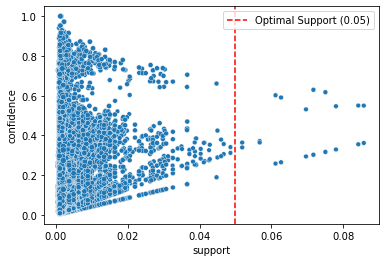

In [20]:
# legend false to remove the lift size legend
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False)
plt.axvline(x=0.05, color='r', linestyle='--', label='Optimal Support (0.05)')
# show the optimal support legend
plt.legend()
plt.show()

## Prune the Transactions and Calculate the Association Rules
- Calculate the association rules using the optimal threshold of 0.05
- Print the total number of rules 

In [21]:
rules = association_rules(frequent_items, metric="support", min_threshold=0.05)

In [22]:
print(rules.shape)

(20, 14)


## Determine Optimal Association Rules
- Print all the rules
- Identify the top 3 rules by filtering the metrics
- Print the top 3 rules

In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Antianxiety Drugs),(Antihypertensives),0.131049,0.236835,0.069591,0.531027,2.242182,1.0,0.038554,1.627313,0.637557,0.233296,0.385490,0.412432
1,(Antihypertensives),(Antianxiety Drugs),0.236835,0.131049,0.069591,0.293836,2.242182,1.0,0.038554,1.230523,0.725932,0.233296,0.187337,0.412432
2,(Antihypertensives),(Antibiotics),0.236835,0.101520,0.061125,0.258092,2.542280,1.0,0.037082,1.211040,0.794916,0.220486,0.174263,0.430096
3,(Antibiotics),(Antihypertensives),0.101520,0.236835,0.061125,0.602101,2.542280,1.0,0.037082,1.917987,0.675198,0.220486,0.478620,0.430096
4,(Antidepressants),(Antihypertensives),0.106053,0.236835,0.062658,0.590823,2.494662,1.0,0.037541,1.865123,0.670223,0.223597,0.463842,0.427694
5,(Antihypertensives),(Antidepressants),0.236835,0.106053,0.062658,0.264565,2.494662,1.0,0.037541,1.215536,0.785078,0.223597,0.177318,0.427694
6,(Anti-Inflammatories),(Antihypertensives),0.113785,0.236835,0.071657,0.629760,2.659065,1.0,0.044709,2.061270,0.704037,0.256870,0.514862,0.466161
7,(Antihypertensives),(Anti-Inflammatories),0.236835,0.113785,0.071657,0.302561,2.659065,1.0,0.044709,1.270671,0.817553,0.256870,0.213014,0.466161
8,(Antihypertensives),(Antipsychotics),0.236835,0.121450,0.074990,0.316634,2.607102,1.0,0.046226,1.285620,0.807732,0.264706,0.222165,0.467044
9,(Antipsychotics),(Antihypertensives),0.121450,0.236835,0.074990,0.617453,2.607102,1.0,0.046226,1.994959,0.701648,0.264706,0.498737,0.467044


In [24]:
# C3: ASSOCIATION RULES TABLE
cols = ["antecedents", "consequents", "support", "lift", "confidence"]

rules[cols]

,antecedents,consequents,support,lift,confidence
0,(Antianxiety Drugs),(Antihypertensives),0.069591,2.242182,0.531027
1,(Antihypertensives),(Antianxiety Drugs),0.069591,2.242182,0.293836
2,(Antihypertensives),(Antibiotics),0.061125,2.542280,0.258092
3,(Antibiotics),(Antihypertensives),0.061125,2.542280,0.602101
4,(Antidepressants),(Antihypertensives),0.062658,2.494662,0.590823
5,(Antihypertensives),(Antidepressants),0.062658,2.494662,0.264565
6,(Anti-Inflammatories),(Antihypertensives),0.071657,2.659065,0.629760
7,(Antihypertensives),(Anti-Inflammatories),0.071657,2.659065,0.302561
8,(Antihypertensives),(Antipsychotics),0.074990,2.607102,0.316634
9,(Antipsychotics),(Antihypertensives),0.074990,2.607102,0.617453


In [25]:
# filter the rules by support, lift, and confidence
top_3_rules = rules[(rules['support'] > 0.06) &
                    (rules['lift'] > 2.5) &
                    (rules['confidence'] > 0.5) 
                   ]

In [26]:
# columns of interest
cols = ["antecedents", "consequents", "antecedent support", "consequent support", "support", "lift", "confidence"]

print(top_3_rules[cols])

             antecedents          consequents  antecedent support  \
3          (Antibiotics)  (Antihypertensives)            0.101520   
6  (Anti-Inflammatories)  (Antihypertensives)            0.113785   
9       (Antipsychotics)  (Antihypertensives)            0.121450   

   consequent support   support      lift  confidence  
3            0.236835  0.061125  2.542280    0.602101  
6            0.236835  0.071657  2.659065    0.629760  
9            0.236835  0.074990  2.607102    0.617453  


## Visualize Association Rules
- Convert the Frozen sets to strings for the visualization labels
- Pivot the rules into a support table for the heatmap

In [27]:
# join the antecedents and consequents to a string format
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [28]:
# pivot the rules into a support table
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

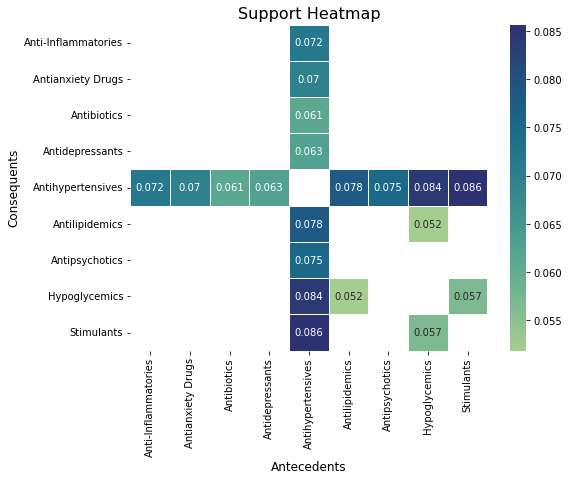

In [29]:
# set size of the visualiztion
plt.figure(figsize=(8, 6))

sns.heatmap(support_table, annot=True, linewidth=.5, cmap="crest")

# add labels
plt.title("Support Heatmap", fontsize=16)
plt.xlabel("Antecedents", fontsize=12)
plt.ylabel("Consequents", fontsize=12)

plt.show()

## Perform a Targeted Basket Analysis on the Classes of a Top Rule
- Create the onehot targeted DataFrame that contains the columns of interest
- Prune the item sets using the Apriori algorithm
- Calculate the rules using a base 0.01 threshold
- Print the rules
- Print all the medications for each class used in this targeted analysis

In [30]:
# select the drugs in the classes Antipsychotics and Antihypertensives
# this is for the third top rule (Antipsychotics) > (Antihypertensives)
onehot_targeted = onehot[medication_classes["Antipsychotics"] + medication_classes["Antihypertensives"]]

In [31]:
# get the item sets for the drugs
frequent_items = apriori(onehot_targeted, use_colnames=True, min_support=0.000001,  max_len=4)

# calcualte the association rules using a base threshold of 0.01
rules = association_rules(frequent_items, metric='support', min_threshold=0.01)

In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(lisinopril),(abilify),0.049127,0.119184,0.020464,0.416554,3.495043,1.0,0.014609,1.509677,0.750763,0.138413,0.337607,0.294127
1,(abilify),(lisinopril),0.119184,0.049127,0.020464,0.171700,3.495043,1.0,0.014609,1.147982,0.810476,0.138413,0.128906,0.294127
2,(carvedilol),(abilify),0.087055,0.119184,0.029863,0.343032,2.878170,1.0,0.019487,1.340729,0.714782,0.169312,0.254137,0.296796
3,(abilify),(carvedilol),0.119184,0.087055,0.029863,0.250559,2.878170,1.0,0.019487,1.218168,0.740855,0.169312,0.179095,0.296796
4,(metoprolol),(abilify),0.047660,0.119184,0.017864,0.374825,3.144926,1.0,0.012184,1.408911,0.716160,0.119911,0.290232,0.262357
5,(abilify),(metoprolol),0.119184,0.047660,0.017864,0.149888,3.144926,1.0,0.012184,1.120252,0.774313,0.119911,0.107344,0.262357
6,(amlodipine),(abilify),0.035729,0.119184,0.011798,0.330224,2.770704,1.0,0.007540,1.315090,0.662760,0.082441,0.239596,0.214609
7,(abilify),(amlodipine),0.119184,0.035729,0.011798,0.098993,2.770704,1.0,0.007540,1.070216,0.725556,0.082441,0.065609,0.214609
8,(abilify),(losartan),0.119184,0.066058,0.015531,0.130313,1.972713,1.0,0.007658,1.073883,0.559804,0.091516,0.068800,0.182715
9,(losartan),(abilify),0.066058,0.119184,0.015531,0.235116,1.972713,1.0,0.007658,1.151568,0.527960,0.091516,0.131619,0.182715


In [33]:
print("Antipsychotics:", medication_classes["Antipsychotics"])
print("\nAntihypertensives:", medication_classes["Antihypertensives"])

Antipsychotics: ['abilify', 'quetiapine']

Antihypertensives: ['benazepril', 'enalapril', 'lisinopril', 'atenolol', 'carvedilol', 'metoprolol', 'metoprolol succinate XL', 'metoprolol tartrate', 'amlodipine', 'benicar', 'losartan', 'valsartan', 'clonidine HCI']


## Dataset Transaction Example

In [34]:
# pre-transformation
medical_df.iloc[3]

Presc01                   citalopram
Presc02                      benicar
Presc03    amphetamine salt combo xr
Presc04                          NaN
Presc05                          NaN
Presc06                          NaN
Presc07                          NaN
Presc08                          NaN
Presc09                          NaN
Presc10                          NaN
Presc11                          NaN
Presc12                          NaN
Presc13                          NaN
Presc14                          NaN
Presc15                          NaN
Presc16                          NaN
Presc17                          NaN
Presc18                          NaN
Presc19                          NaN
Presc20                          NaN
Name: 3, dtype: object

In [35]:
# post-transformation
onehot_classes.iloc[3]

Analgesics                False
Antianxiety Drugs         False
Antiarrhythmics           False
Antibiotics               False
Anticoagulants            False
Anticonvulsants           False
Antidepressants            True
Antifungals               False
Antihistamines            False
Antihypertensives          True
Anti-Inflammatories       False
Antipsychotics            False
Antivirals                False
Bronchodilators           False
Corticosteroids           False
Diuretics                 False
Hormones                  False
Hypoglycemics             False
Muscle Relaxants          False
Vitamins                  False
Antacids                  False
Antilipidemics            False
Antianginals              False
Bone Health               False
Electrolytes              False
Erectile Dysfunction      False
Gout Medications          False
Proton Pump Inhibitors    False
Prostate                  False
Stimulants                 True
Name: 3, dtype: bool

## Export the Cleaned Dataset for the Analysis

In [36]:
#onehot_classes.to_csv('onehot_T3.csv', index=False)

# Conclusion

## Summary of Findings

This market basket analysis successfully identified meaningful associations between medication classifications using the Apriori algorithm and association rule metrics. The key findings include:

1. **Strong Associations with Antihypertensives**: The top three association rules all involved antihypertensives as the consequent, indicating that patients prescribed antibiotics, anti-inflammatories, or antipsychotics were approximately 2.5 times more likely to also receive antihypertensives than by random chance.

2. **High Confidence Values**: The associations demonstrated strong confidence values between 60-63%, meaning that a significant majority of patients prescribed the antecedent medications also received the consequent medication.

3. **Frequent Occurrences**: The identified rules were present in approximately 6-7.5% of all transactions, indicating these are common medication combinations prescribed to patients.

4. **Medical Rationale**: The strong associations between these medication classes align with medical understanding:
   - Individuals with hypertension often experience chronic inflammation that can weaken immune systems, potentially explaining the antibiotics-antihypertensives relationship
   - The inflammatory nature of cardiovascular conditions explains the anti-inflammatories-antihypertensives connection
   - Some antipsychotic medications have side effects including increased blood pressure, which may explain their association with antihypertensives

## Business Implications

These findings have several practical applications for healthcare providers:

1. **Targeted Analysis Opportunities**: The identified associations provide a foundation for more focused analyses of specific medication combinations to determine their impact on patient outcomes and readmission rates.

2. **Protocol Refinement**: By understanding which medication combinations are most common, healthcare providers can evaluate their effectiveness and potentially refine prescription protocols.

3. **Readmission Reduction**: Further exploration of these medication combinations could reveal which specific combinations correlate with lower readmission rates, helping hospitals avoid CMS penalties while improving patient care.

4. **Personalized Treatment**: The insights can inform more personalized treatment strategies based on understanding the relationships between medication classes across different patient demographics.

## Future Directions

To maximize the value of these findings, healthcare providers should:

1. Further explore the relationship between identified medication combinations and readmission rates
2. Analyze how these medication associations vary across different patient demographics
3. Investigate specific medications within these classifications to identify the most effective combinations
4. Implement monitoring systems for these common medication combinations to track patient outcomes
5. Develop clinical decision support tools that leverage these association patterns to guide prescription practices

This analysis demonstrates the value of data mining techniques in uncovering hidden patterns in healthcare data, potentially leading to improved patient care, reduced costs, and more efficient healthcare delivery.